In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def addPixel(a,b):
    gl.glVertex2f( a/(WIDTH/2), b/(HEIGHT/2) )

In [ ]:
def eightway_symetry(x, y, a, b):
    addPixel(x + a, y + b)
    addPixel(y + a, x + b)
    addPixel(y + a, -x + b)
    addPixel(x + a, -y + b)
    addPixel(-x + a, -y + b)
    addPixel(-y + a, -x + b)
    addPixel(-y + a, x + b)
    addPixel(-x + a, y + b)

def midpoint_circle(radius,centerX = 0, centerY = 0):
    gl.glBegin(gl.GL_POINTS)
    x = 0
    y = radius
    d = 1 - radius
    while x <= y:
        eightway_symetry(x,y,centerX,centerY)
        if d < 0:
            d += 2 * x + 3
        else:
            d += 2 * (x - y) + 5
            y -= 1
        x += 1
    gl.glEnd()

In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


gl.glColor3f(1,0,0)
gl.glPointSize(1)

midpoint_circle(100)
midpoint_circle(100,100,100)


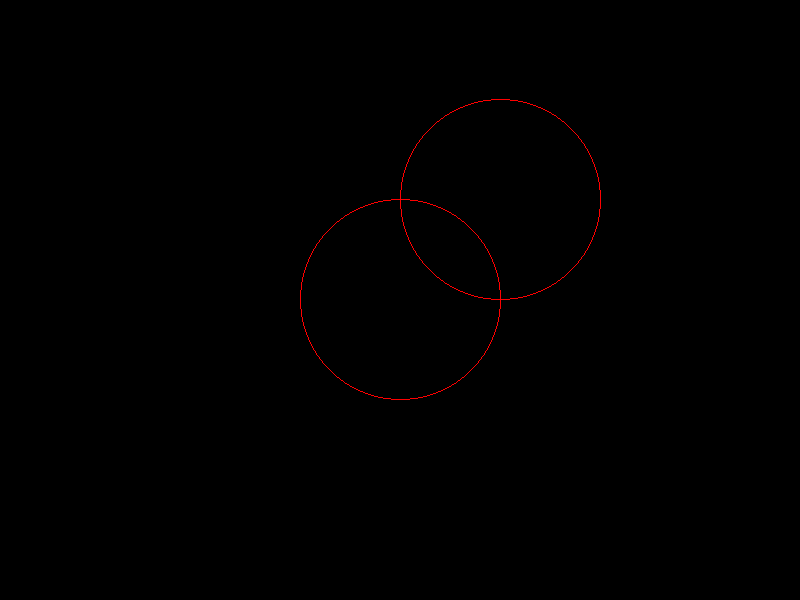

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

In [ ]:
from math import radians as rad
from math import sin, cos
def pattern(n = 8, r = 200, centerX = 0, centerY = 0):
    midpoint_circle(r,centerX, centerY)
    theta = 0
    del_theta = 360/n
    small_r = r//2
    for i in range(n):
      newCenterX = small_r*cos(rad(theta))
      newCenterY = small_r*sin(rad(theta))
      midpoint_circle(small_r,newCenterX + centerX, newCenterY + centerY)
      theta += del_theta




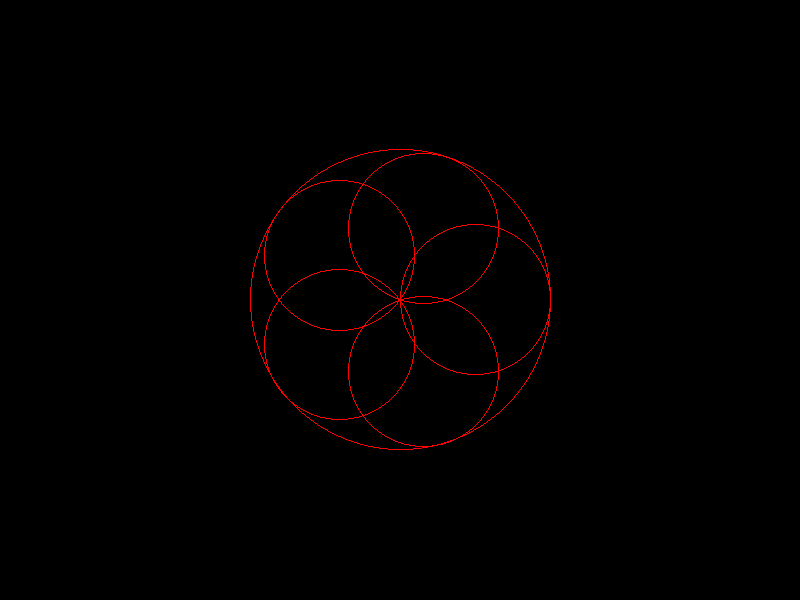

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(1,0,0)
gl.glPointSize(1)

pattern(5, r =  150)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)